In [1]:
# Linear Regression

In [2]:
# Importing data

In [3]:
!pip install numpy
!pip install matplotlib
!pip install pandas

  Using cached numpy-1.21.5-cp39-cp39-win_amd64.whl (14.0 MB)
  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Using cached fonttools-4.28.5-py3-none-any.whl (890 kB)
  Using cached Pillow-8.4.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pandas-1.3.5-cp39-cp39-win_amd64.whl (10.2 MB)


In [4]:
!pip list

Package             Version
------------------- ---------
argon2-cffi         20.1.0
async-generator     1.10
attrs               21.2.0
backcall            0.2.0
bleach              4.0.0
certifi             2021.10.8
cffi                1.15.0
colorama            0.4.4
cycler              0.11.0
debugpy             1.5.1
decorator           5.1.0
defusedxml          0.7.1
entrypoints         0.3
fonttools           4.28.5
importlib-metadata  4.8.2
ipykernel           6.4.1
ipython             7.29.0
ipython-genutils    0.2.0
jedi                0.18.0
Jinja2              3.0.2
jsonschema          3.2.0
jupyter-client      7.0.6
jupyter-core        4.9.1
jupyterlab-pygments 0.1.2
kiwisolver          1.3.2
MarkupSafe          2.0.1
matplotlib          3.5.1
matplotlib-inline   0.1.2
mistune             0.8.4
nbclient            0.5.3
nbconvert           6.1.0
nbformat            5.1.3
nest-asyncio        1.5.1
notebook            6.4.6
numpy               1.21.5
packaging           21.

In [13]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Importing the datasets
df = pd.read_csv('nastyaa.csv', sep=',')

In [15]:
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


In [16]:
# Correlations

In [18]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.7.3-cp39-cp39-win_amd64.whl (34.3 MB)


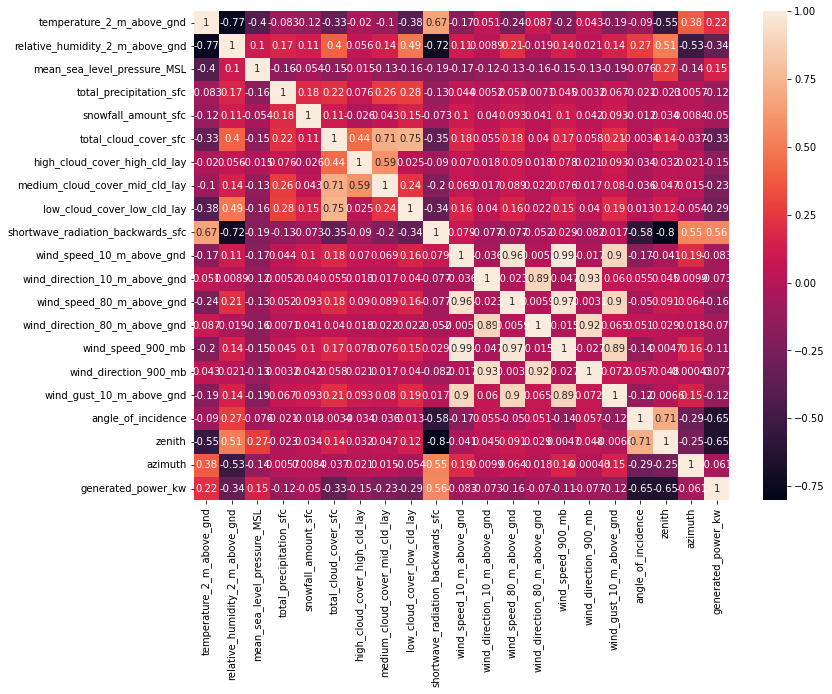

In [19]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [29]:
# Splitting

In [30]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1]
y = df['azimuth']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [31]:
# Simple Linear Regression

In [34]:
# Fitting Simple Linear Regression to the Training set (M2)
f1 = ['zenith']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)



In [36]:
# Getting parameters
sr.coef_, sr.intercept_

(array([-0.79727583]), 216.81885078945552)

In [37]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.06

In [38]:
y_pred = sr.predict(X_test[f1])

sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.06, 0.065)

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(62.79, 61.58)

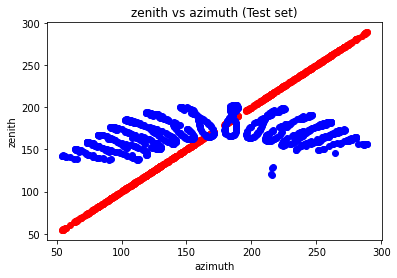

In [40]:
# Visualising the Test set results
plt.scatter(X_test['azimuth'], y_test, color = 'red')
plt.plot(X_test['azimuth'], sr.predict(X_test[f1]), 'bo')
plt.title('zenith vs azimuth (Test set)')
plt.xlabel('azimuth')
plt.ylabel('zenith')
plt.show()

In [41]:
# Multiple Linear Regression

In [42]:
!pip install statsmodels

In [43]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

1.0

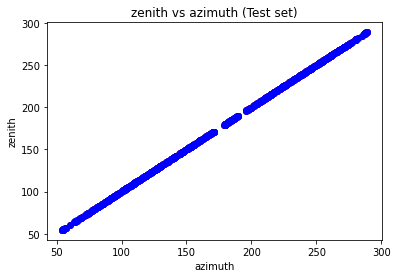

In [44]:
# Visualising the Test set results
plt.scatter(X_test['azimuth'], y_test, color = 'red')
plt.plot(X_test['azimuth'], mr.predict(X_test), 'bo')
plt.title('zenith vs azimuth (Test set)')
plt.xlabel('azimuth')
plt.ylabel('zenith')
plt.show()

In [45]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()

In [46]:
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                azimuth   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.009e+30
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:39:38   Log-Likelihood:                 91269.
No. Observations:                3370   AIC:                        -1.825e+05
Df Residuals:                    3349   BIC:                        -1.824e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -1.38e-12   1.47e-12     -0.939      0.348   -4.26e-12     1.5e-12
temperature_2_m_above_gnd          1.276e-15   1.83e-15      0.696      0.487   -2.32e-15    4.87e-15
relative_humidity_2_m_above_gnd   -1.874e-16   6.39e-16     -0.293      0.769   -1.44e-15    1.07e-15
mean_sea_level_pressure_MSL        1.868e-15   1.42e-15      1.314      0.189   -9.19e-16    4.66e-15
total_precipitation_sfc            4.871e-14   4.97e-14      0.980      0.327   -4.88e-14    1.46e-13
snowfall_amount_sfc               -2.961e-13   1.81e-13     -1.633      0.103   -6.52e-13    5.94e-14
total_cloud_cover_sfc             -4.788e-16   5.03e-16     -0.952      0.341   -1.47e-15    5.08e-16
high_cloud_cover_high_cld_lay      4.987e-17   3.14e-16      0.159      0.874   -5.66e-16    6.66e-16
medium_cloud_cover_mid_cld_lay     4.573e-16   4.03e-16      1.134      0.257   -3.33e-16    1.25e-15
low_cloud_cover_low_cld_lay        5.326e-16   4.35e-16      1.226      0.220   -3.19e-16    1.38e-15
shortwave_radiation_backwards_sfc -5.519e-17   7.14e-17     -0.773      0.440   -1.95e-16    8.48e-17
wind_speed_10_m_above_gnd          5.225e-15    7.4e-15      0.706      0.480   -9.29e-15    1.97e-14
wind_direction_10_m_above_gnd     -4.532e-16   1.95e-16     -2.326      0.020   -8.35e-16   -7.11e-17
wind_speed_80_m_above_gnd         -2.163e-15   3.05e-15     -0.710      0.478   -8.14e-15    3.81e-15
wind_direction_80_m_above_gnd     -1.315e-15    1.8e-16     -7.301      0.000   -1.67e-15   -9.62e-16
wind_speed_900_mb                  4.302e-16   7.76e-15      0.055      0.956   -1.48e-14    1.56e-14
wind_direction_900_mb             -7.566e-16   2.26e-16     -3.346      0.001    -1.2e-15   -3.13e-16
wind_gust_10_m_above_gnd          -8.127e-16   1.46e-15     -0.557      0.577   -3.67e-15    2.05e-15
angle_of_incidence                 3.309e-16   5.22e-16      0.634      0.526   -6.92e-16    1.35e-15
zenith                             2.118e-15   9.71e-16      2.181      0.029    2.14e-16    4.02e-15
azimuth                               1.0000   1.79e-16    5.6e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      265.144   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.061
Skew:                          -0.265   Prob(JB):                     1.40e-26
Kurtosis:                       2.246   Cond. No.                     2.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+05. This might indic

In [47]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p, y_train)
pr.coef_, pr.intercept_

(array([ 4.24052609e-12, -6.65708814e-12, -1.80639340e-12, -9.67777528e-12,
         2.06150377e-10, -8.22550923e-10, -5.43290026e-13,  1.58831845e-12,
        -9.83308812e-13, -7.85371798e-13, -7.81019143e-13,  3.22362314e-11,
        -4.85289448e-13, -8.41832999e-12, -5.45411616e-13, -2.53880611e-11,
         1.88354391e-13,  2.68476482e-12,  3.22054421e-12, -6.28227988e-12,
         1.00000000e+00,  5.59896232e-14, -4.46875609e-15,  7.76548456e-15,
        -1.06073912e-12, -6.12962074e-12, -2.34646693e-14,  1.80752935e-15,
         1.36416554e-14,  1.13133515e-14, -2.26175415e-15, -6.29552020e-14,
         3.20532175e-15, -1.78589782e-15, -1.83880688e-15,  5.63986791e-14,
        -1.06165077e-15,  1.85788884e-15, -1.31335914e-14,  1.16677501e-14,
        -5.46784840e-15, -1.46063717e-15,  1.94289029e-15, -1.94276886e-13,
        -1.05389136e-12, -5.51642065e-16, -1.23924308e-16,  1.63757896e-15,
         4.57966998e-16,  5.13478149e-16, -2.40286035e-14,  1.02001740e-15,
        -3.1

In [48]:
y_pred = pr.predict(X_test_p)
pr.score(X_train_p, y_train).round(3)

1.0

In [49]:
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.0, 0.0)

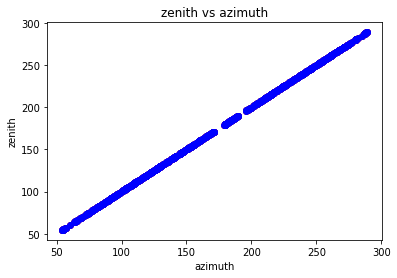

In [50]:
plt.scatter(X_test['azimuth'], y_test, color = 'red')
plt.plot(X_test['azimuth'], pr.predict(X_test_p), 'bo')
plt.title('zenith vs azimuth')
plt.xlabel('azimuth')
plt.ylabel('zenith')
plt.show()

In [51]:
# Pickle 

In [52]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()